<a href="https://colab.research.google.com/github/Zann181/ProbabilidadYEs/blob/main/probablilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving punto_3.xlsx to punto_3.xlsx


In [ ]:
import pandas as pd
import numpy as np

# Especifica la ruta del archivo Excel que has cargado
file_path = "punto_3.xlsx"  # Reemplaza "nombre_del_archivo.xlsx" con el nombre de tu archivo

# Lee el archivo Excel en un DataFrame de Pandas
df = pd.read_excel(file_path)

# Extrae la columna de interés
columna_de_datos = df["Porcentaje de Ki-67 en pacientes entre 26 y 82"]

# Calcula el tamaño del rango de los datos
rango = columna_de_datos.max() - columna_de_datos.min()
datos= len(columna_de_datos)
# Calcula el número de clases utilizando la fórmula de Sturges
num_clases = 1 + 3.3*np.log10(len(columna_de_datos))

# Calcula la amplitud de clase
amplitud_clase = np.ceil(rango / num_clases)
print("Numero de Muestra:", datos)
print("Tamaño del rango:", rango)
print("Número de filas:", round(num_clases))
print("Amplitud de clase:", amplitud_clase)


# Encuentra la posición del número más grande en la columna de datos
posicion_maximo = columna_de_datos.idxmax()

print("La posición del número más grande es:", posicion_maximo)

# Encuentra el valor del número más grande
valor_maximo = columna_de_datos[posicion_maximo]

print("El número más grande en la columna de datos es:", valor_maximo)

# Lee el archivo Excel en un DataFrame de Pandas
df = pd.read_excel(file_path)

# Muestra los datos del DataFrame
print(df)


Numero de Muestra: 203
Tamaño del rango: 74.0
Número de filas: 9
Amplitud de clase: 9.0
La posición del número más grande es: 67
El número más grande en la columna de datos es: 75.0
     Porcentaje de Ki-67 en pacientes entre 26 y 82
0                                             10.12
1                                             10.15
2                                             19.30
3                                             33.00
4                                              9.63
..                                              ...
198                                            3.42
199                                            7.53
200                                            6.03
201                                            7.00
202                                           17.80

[203 rows x 1 columns]


In [ ]:

# Calcula los límites inferior y superior para cada clase
limites_inferiores = [columna_de_datos.min() + i * amplitud_clase for i in range(int(round(num_clases)))]
limites_superiores = [limite + amplitud_clase for limite in limites_inferiores[:-1]]
limites_superiores.append(columna_de_datos.max())

# Calcula la frecuencia de cada clase
frecuencias = []
for i in range(int(round(num_clases))):
    if i == int(round(num_clases)) - 1:
        frecuencia = len(columna_de_datos[(columna_de_datos >= limites_inferiores[i]) & (columna_de_datos <= limites_superiores[i])])
    else:
        frecuencia = len(columna_de_datos[(columna_de_datos >= limites_inferiores[i]) & (columna_de_datos < limites_superiores[i])])
    frecuencias.append(frecuencia)

# Calcula la frecuencia acumulada
frecuencias_acumuladas = np.cumsum(frecuencias)

# Calcula la densidad de frecuencia (frecuencia relativa)
densidades_frecuencia = [frecuencia / datos for frecuencia in frecuencias]

# Calcula la frecuencia acumulada relativa
frecuencias_acumuladas_relativas = np.cumsum(densidades_frecuencia)

# Calcula el punto medio de cada clase
puntos_medios_clases = [(lim_inf + lim_sup) / 2 for lim_inf, lim_sup in zip(limites_inferiores, limites_superiores)]

# Crea un DataFrame para la tabla de distribución de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Li': limites_inferiores,
    'Ls': limites_superiores,
    'fi': frecuencias,
    'Fi': frecuencias_acumuladas,
    'hi': densidades_frecuencia,
    'Hi': frecuencias_acumuladas_relativas,
    'yi': puntos_medios_clases
})

print(tabla_frecuencias)

     Li    Ls   fi   Fi        hi        Hi    yi
0   1.0  10.0  102  102  0.502463  0.502463   5.5
1  10.0  19.0   45  147  0.221675  0.724138  14.5
2  19.0  28.0   25  172  0.123153  0.847291  23.5
3  28.0  37.0   18  190  0.088670  0.935961  32.5
4  37.0  46.0    7  197  0.034483  0.970443  41.5
5  46.0  55.0    4  201  0.019704  0.990148  50.5
6  55.0  64.0    0  201  0.000000  0.990148  59.5
7  64.0  73.0    0  201  0.000000  0.990148  68.5
8  73.0  75.0    2  203  0.009852  1.000000  74.0


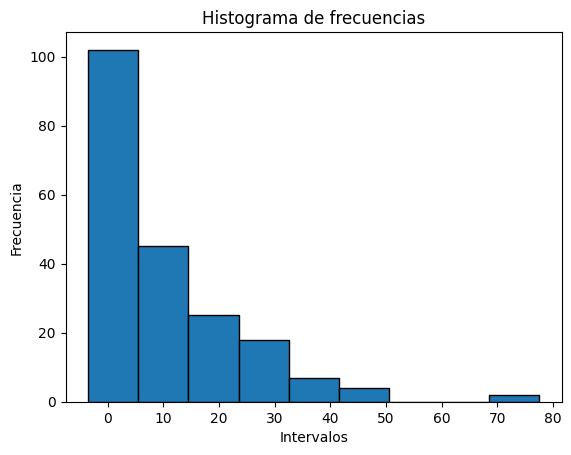

In [ ]:
import matplotlib.pyplot as plt

# Valores para el eje x (límites inferiores de las clases)
x = tabla_frecuencias['Li']

# Valores para el eje y (frecuencias absolutas)
y = tabla_frecuencias['fi']

# Título y etiquetas de los ejes
plt.title('Histograma de frecuencias')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')

# Crear el histograma
plt.bar(x, y, width=amplitud_clase, edgecolor='black')

# Mostrar el histograma
plt.show()


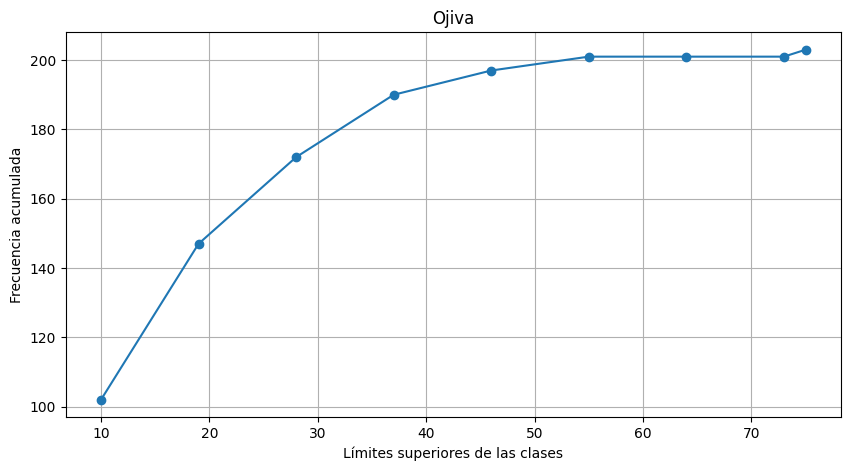

In [ ]:

# Ojiva
plt.figure(figsize=(10, 5))
plt.plot(tabla_frecuencias['Ls'], tabla_frecuencias['Fi'], marker='o', linestyle='-')
plt.title('Ojiva')
plt.xlabel('Límites superiores de las clases')
plt.ylabel('Frecuencia acumulada')
plt.grid(True)
plt.show()



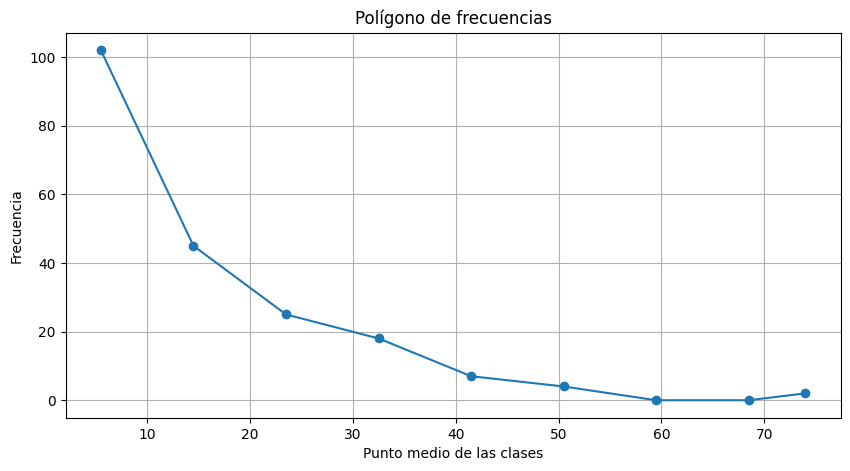

In [ ]:
# Polígono de frecuencias
plt.figure(figsize=(10, 5))
plt.plot(tabla_frecuencias['yi'], tabla_frecuencias['fi'], marker='o', linestyle='-')
plt.title('Polígono de frecuencias')
plt.xlabel('Punto medio de las clases')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



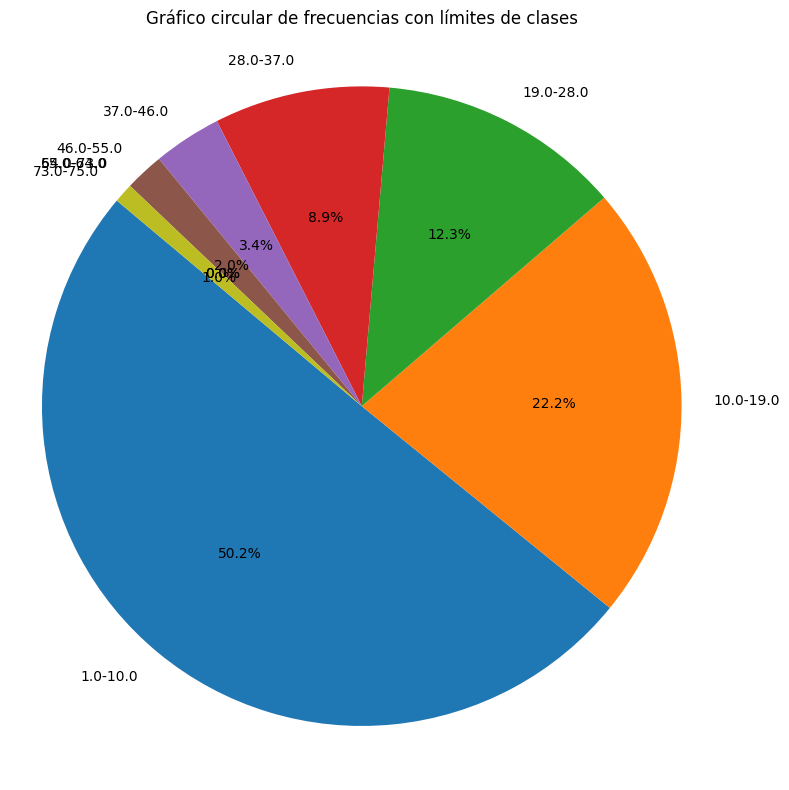

In [ ]:
# Gráfico circular mejorado con límites de clases y etiquetas rotadas
plt.figure(figsize=(8, 8))
plt.pie(tabla_frecuencias['fi'], labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico circular de frecuencias con límites de clases')
plt.axis('equal')
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos


plt.show()



In [ ]:

# Calcula la media
media = np.mean(columna_de_datos)

# Calcula la mediana
mediana = np.median(columna_de_datos)

# Calcula la desviación estándar
desviacion_estandar = np.std(columna_de_datos)

# Calcula la varianza
varianza = np.var(columna_de_datos)

# Calcula el coeficiente de asimetría
diferencia_cuadrada = (columna_de_datos - media) ** 3
coeficiente_asimetria = np.mean(diferencia_cuadrada) / (desviacion_estandar ** 3)

# Muestra los resultados
print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Varianza:", varianza)
print("Coeficiente de asimetría:", coeficiente_asimetria)

Media: 14.516157635467978
Mediana: 9.88
Desviación estándar: 12.820067897685233
Varianza: 164.35414090125946
Coeficiente de asimetría: 1.823200042609744


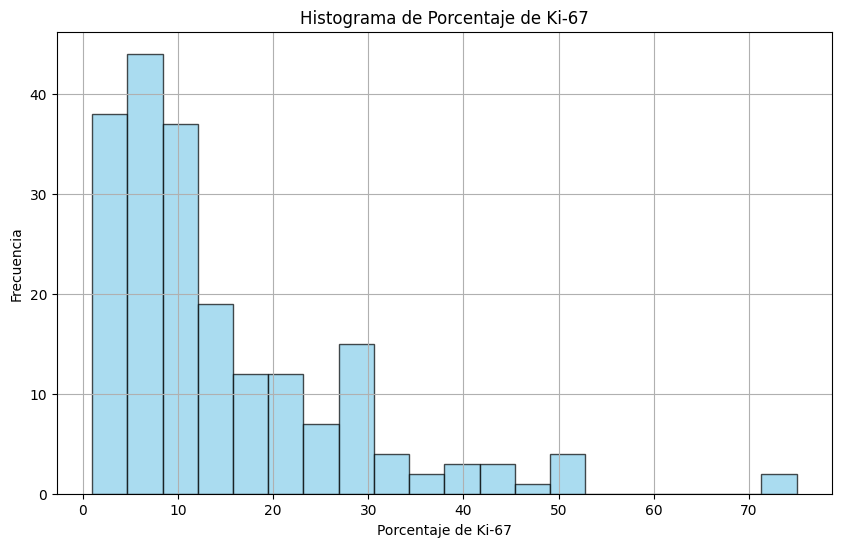

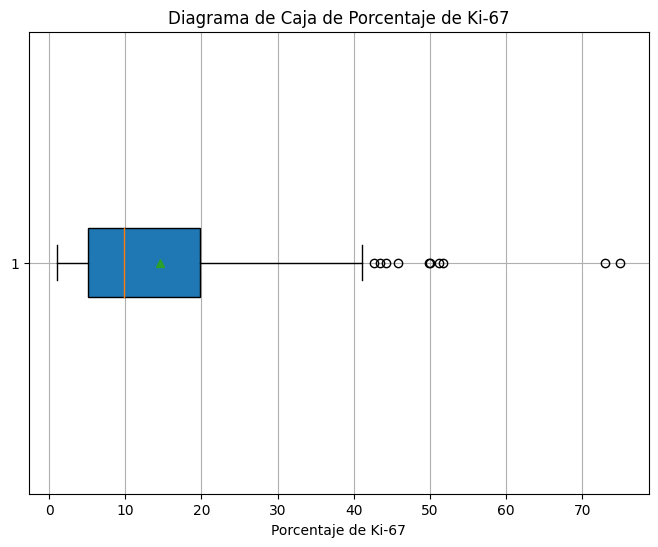

In [ ]:
# Graficar histograma
plt.figure(figsize=(10, 6))
plt.hist(columna_de_datos, bins=20, color="skyblue", edgecolor='black', alpha=0.7)
plt.title('Histograma de Porcentaje de Ki-67')
plt.xlabel('Porcentaje de Ki-67')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Graficar diagrama de caja (boxplot)
plt.figure(figsize=(8, 6))
plt.boxplot(columna_de_datos, vert=False, patch_artist=True, showmeans=True)
plt.title('Diagrama de Caja de Porcentaje de Ki-67')
plt.xlabel('Porcentaje de Ki-67')
plt.grid(True)
plt.show()